---
## **GET THE EARNINGS DATA OF A PUBLIC COMPANY (USE SYMBOL)**
---
1. Plot Company XXX's eps over all given fiscal ending period

+ a) Annotate the point at which EPS is highest

2. Find identifiers that lead to a sharp decrease

+ a) Create a table for date, eps, and %change in eps

+ b) Look for 5 rows with biggest %change

+ c) make a plot showing highligting top 5 highest %change

In [1]:
import requests
import pandas
import json

from google.colab import userdata

API_KEY = userdata.get("ALPHAVANTAGE_API_KEY") ## INSERT YOUR OWN API KEY

# Asking for input, insert Ticker
SYMBOL = input("Company Symbol: ")
# Cutting empty spaces and uppercase
SYMBOL = SYMBOL.replace(' ', '').upper()



url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={SYMBOL}&apikey={API_KEY}&outputsize=full'

r = requests.get(url)

data = json.loads(r.text)

# If data is not available from ALPHAVANTAGE
if len(data) < 1:
    print("Company symbol not available.")

Company Symbol:           NVDA


In [2]:
# 1. Plot Company XXX's eps over all given fiscal ending period
#   a) Annotate the point at which EPS is highest

import plotly.express as px
from IPython.display import HTML

fiscal_year_ending = [year['fiscalDateEnding'] for year in data['annualEarnings']]
eps_year_ending = [float(eps['reportedEPS']) for eps in data['annualEarnings']]

max_value = {}

for i in data['annualEarnings']:
    if float(i['reportedEPS']) == max(eps_year_ending):
        max_value.update(i)

eps_over_time = px.line(x=fiscal_year_ending, y=eps_year_ending, height=350,
              labels={"x": "Fiscal Year Ending", "y": "Reported EPS"},
              title=f"Fiscal Year Ending Reported EPS for {SYMBOL}")\
    .update_yaxes(dtick=2)\
    .add_annotation(x=max_value['fiscalDateEnding'], y=max_value['reportedEPS'], \
                    text=f"(EPS: {max_value['reportedEPS']}), (Date: {max_value['fiscalDateEnding']})", showarrow=True,
                    arrowhead=2, font=dict(size=12), bgcolor="white")

# View image with Github
graph_image = eps_over_time.to_html(full_html=False, include_plotlyjs='cdn')
display(HTML(graph_image))

In [3]:
# 2. Find identifiers that lead to a sharp decrease
#   a) Create a table for date, eps, and %change in eps
#   b) Look for 5 rows with biggest %change
#   c) make a plot showing highlights for top 5 highest %change

#   a) Create a table for date, eps, and %change in eps
import pandas as pd

df = pd.DataFrame(data['annualEarnings'])
df.index += 1

df['fiscalDateEnding'] = pd.to_datetime(df['fiscalDateEnding'])

df['reportedEPS'] = pd.to_numeric(df['reportedEPS'])

eps0 = df['reportedEPS']
eps1 = df['reportedEPS'].shift(-1)

df['% in reportedEPS'] = ((eps0 - eps1) / eps0) * 100

df['Absolute Value of Change'] = abs(df['% in reportedEPS'])

df.fillna(0, inplace=True)

df



,fiscalDateEnding,reportedEPS,% in reportedEPS,Absolute Value of Change
1,2024-01-31,12.9700,74.325366,74.325366
2,2023-01-31,3.3300,-33.633634,33.633634
3,2022-01-31,4.4500,43.595506,43.595506
4,2021-01-31,2.5100,42.231076,42.231076
5,2020-01-31,1.4500,-14.482759,14.482759
6,2019-01-31,1.6600,30.722892,30.722892
7,2018-01-31,1.1500,44.347826,44.347826
8,2017-01-31,0.6400,53.125000,53.125000
9,2016-01-31,0.3000,6.666667,6.666667
10,2015-01-31,0.2800,35.714286,35.714286


In [4]:
#   b) Look for 5 rows with biggest %change
five_spikes = df.sort_values(by='Absolute Value of Change', ascending = False).head(5)
five_spikes

,fiscalDateEnding,reportedEPS,% in reportedEPS,Absolute Value of Change
16,2009-01-31,0.13,-200.000000,200.000000
1,2024-01-31,12.97,74.325366,74.325366
23,2002-01-31,0.10,60.000000,60.000000
8,2017-01-31,0.64,53.125000,53.125000
24,2001-01-31,0.04,-50.000000,50.000000


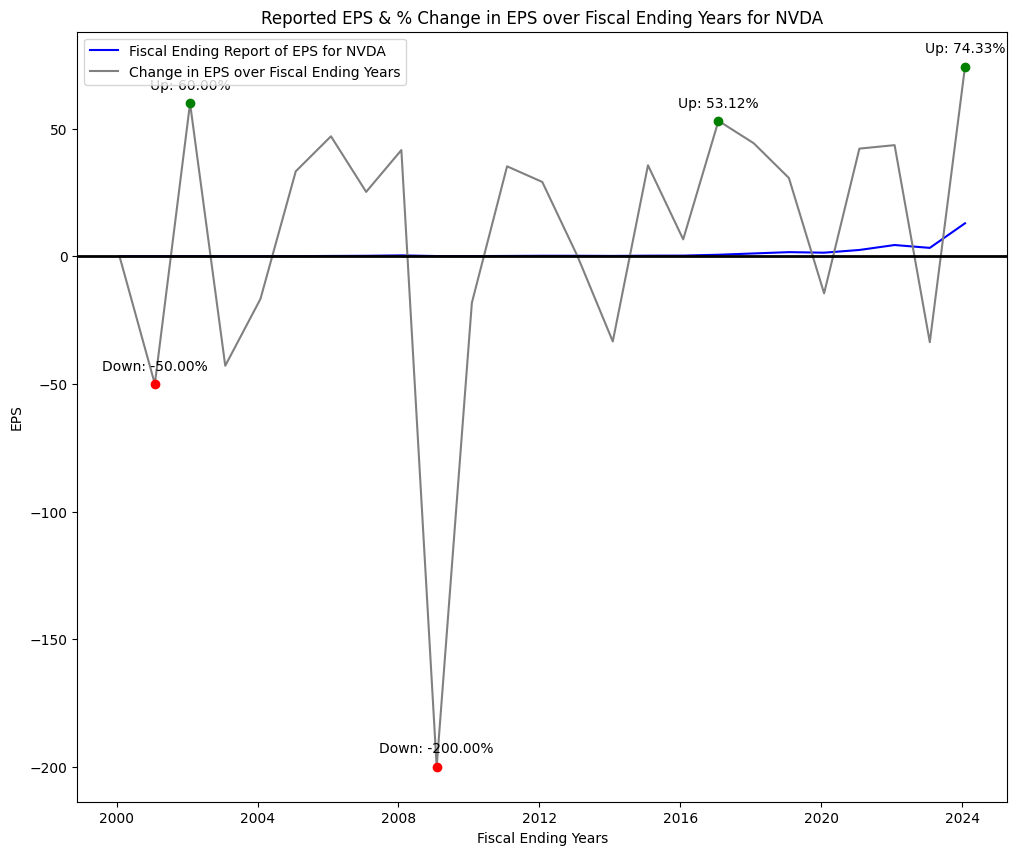

In [5]:
#   c) make a plot showing highlights for top 5 highest %change

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.plot(df['fiscalDateEnding'], df['reportedEPS'], color = 'blue', label=f'Fiscal Ending Report of EPS for {SYMBOL}')
plt.plot(df['fiscalDateEnding'], df['% in reportedEPS'], color = 'gray', label='Change in EPS over Fiscal Ending Years')
plt.axhline(0, color='black', linewidth=2)
plt.title(f'Reported EPS & % Change in EPS over Fiscal Ending Years for {SYMBOL}')
plt.xlabel('Fiscal Ending Years')
plt.ylabel('EPS')
plt.legend()

spike_list = five_spikes.to_dict('records')

for i in spike_list:
    formatted = format(i['% in reportedEPS'], '.2f')
    if float(i['% in reportedEPS']) < 0:
        text = f"Down: {formatted}%"
        indicator = 'ro'
    else:
        text = f"Up: {formatted}%"
        indicator = 'go'
    plt.annotate(text, (i['fiscalDateEnding'], i['% in reportedEPS']),
                 textcoords="offset points", xytext=(0,10), ha='center')
    plt.plot(i['fiscalDateEnding'], i['% in reportedEPS'], indicator )


plt.show()

